# California Housing Price Prediction .

DESCRIPTION

Background of Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

Domain: Finance and Housing

Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

1. Load the data :

Read the “housing.csv” file from the folder into the program.
Print first few rows of this data.
Extract input (X) and output (Y) data from the dataset.
2. Handle missing values :

Fill the missing values with the mean of the respective column.
3. Encode categorical data :

Convert categorical column in the dataset to numerical data.
4. Split the dataset : 

Split the data into 80% training dataset and 20% test dataset.
5. Standardize data :

Standardize training and test datasets.
6. Perform Linear Regression : 

Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

7. Bonus exercise: Perform Linear Regression with one independent variable :

Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.
Dataset Description :

Field	Description
longitude	(signed numeric - float) : Longitude value for the block in California, USA
latitude	(numeric - float ) : Latitude value for the block in California, USA
housing_median_age	(numeric - int ) : Median age of the house in the block
total_rooms	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
total_bedrooms	(numeric - float ) : Count of the total number of bedrooms in all houses in the block
population	(numeric - int ) : Count of the total number of population in the block
households	(numeric - int ) : Count of the total number of households in the block
median_income	(numeric - float ) : Median of the total household income of all the houses in the block
ocean_proximity	(numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
median_house_value	(numeric - int ) : Median of the household prices of all the houses in the block
 

Dataset Size : 20640 rows x 10 columns

In [96]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [4]:
%config IPCompleter.greedy=True

In [5]:
ca = pd.read_excel("1553768847_housing.xlsx")

In [6]:
ca.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
ca.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [8]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [9]:
ca[ca["total_bedrooms"].isnull()].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,207.000000,207.000000,207.000000,207.000000,0.0,207.000000,207.000000,207.000000,207.000000
mean,-119.472560,35.497633,29.270531,2562.603865,NaN,1477.772947,510.024155,3.822244,206007.280193
std,2.001424,2.097298,11.964927,1787.269789,NaN,1057.448212,386.120704,1.955595,111638.214545
min,-124.130000,32.660000,4.000000,154.000000,NaN,37.000000,16.000000,0.852700,45800.000000
25%,-121.810000,33.970000,19.000000,1307.500000,NaN,781.000000,258.000000,2.564150,128750.000000
50%,-118.490000,34.200000,30.000000,2155.000000,NaN,1217.000000,427.000000,3.411500,175000.000000
75%,-117.985000,37.495000,38.000000,3465.000000,NaN,1889.500000,628.000000,4.615750,267700.000000
max,-114.590000,40.920000,52.000000,11709.000000,NaN,7604.000000,3589.000000,15.000100,500001.000000


In [10]:
ca["total_bedrooms"].std()

421.3850700740323

In [11]:
ca["total_bedrooms"].min()

1.0

In [12]:
ca["total_bedrooms"].max()

6445.0

In [13]:
ca["total_bedrooms"].mean()

537.8705525375618

In [14]:
ca["total_bedrooms"].median()

435.0

In [15]:
ca["total_rooms"].std()

2181.615251582795

In [16]:
ca["total_rooms"].min()

2

In [17]:
ca["total_rooms"].max()

39320

In [18]:
ca["total_rooms"].median()

2127.0

In [19]:
ca["total_rooms"].median()/ca["total_bedrooms"].median()

4.889655172413793

In [20]:
ca["total_bedrooms"] = ca["total_bedrooms"].fillna(0)

In [21]:
ca["total_bedrooms"].count()

20640

In [22]:
total_bedrooms_null = ca.loc[ca["total_bedrooms"].isnull(), "total_rooms"]

In [23]:
print(total_bedrooms_null)

Series([], Name: total_rooms, dtype: int64)


In [24]:
ca["total_bedrooms"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool

In [25]:
for i in ca.index:
    if ca['total_bedrooms'][i]==0:
        ca['total_bedrooms'][i] = ca['total_rooms'][i]/5

C:\Users\SaaiM\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [27]:
ca.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.616318,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.792318,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


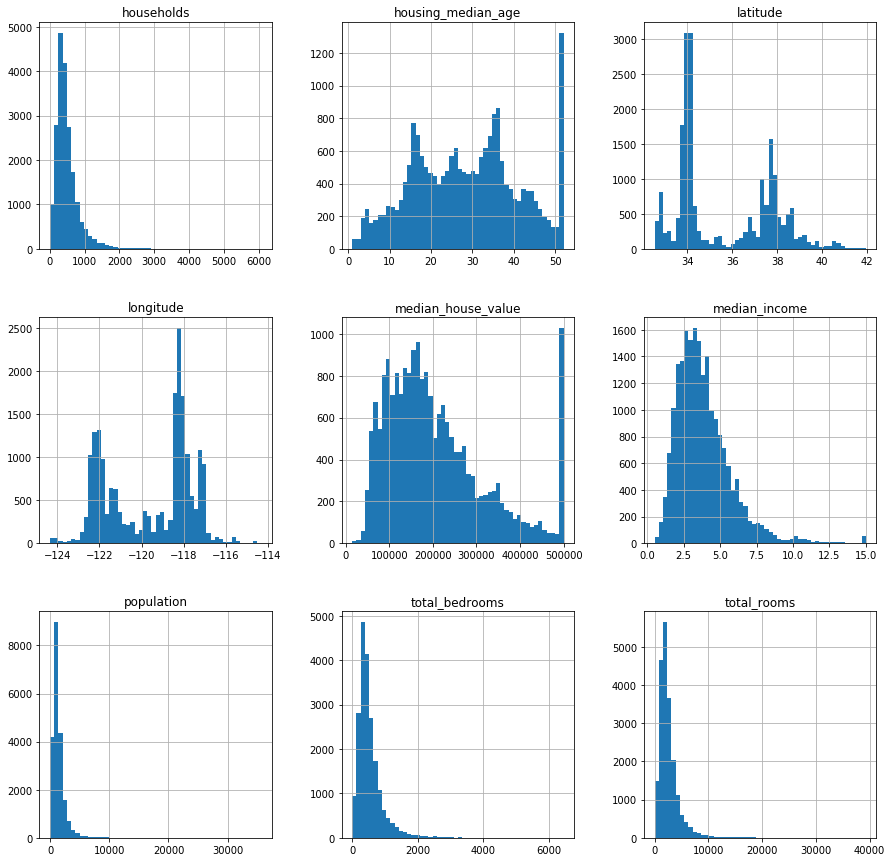

In [28]:
y = ca.median_house_value

In [29]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

In [30]:
X = ca.drop("median_house_value",1)

In [31]:
X.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.616318,1425.476744,499.539680,3.870671
std,2.003532,2.135952,12.585558,2181.615252,420.792318,1132.462122,382.329753,1.899822
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [32]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [33]:
X.ocean_proximity.unique() 

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [34]:
X['near_bay'] = X.apply(lambda row: 1 if row.ocean_proximity=="NEAR BAY" else (0), axis = 1)
X['1h_ocean'] = X.apply(lambda row: 1 if row.ocean_proximity=="<1H OCEAN" else (0), axis = 1)
X['inland'] = X.apply(lambda row: 1 if row.ocean_proximity=="INLAND" else (0), axis = 1)
X['island'] = X.apply(lambda row: 1 if row.ocean_proximity=="ISLAND" else (0), axis = 1)
X['near_ocean'] = X.apply(lambda row: 1 if row.ocean_proximity=="NEAR OCEAN" else (0), axis = 1)

In [35]:
X = X.drop("ocean_proximity",1)

In [36]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,near_bay,1h_ocean,inland,island,near_ocean
0,-122.23,37.88,41,880,129.0,322,126,8.3252,1,0,0,0,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,1,0,0,0,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,1,0,0,0,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,1,0,0,0,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,0,0,1,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,0,0,1,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,0,0,1,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,0,0,1,0,0


In [69]:
# Calculate and show correlation matrix
#cm = np.corrcoef(X_train)
cm=ca.corr()
#hm = sns.heatmap(cm,
                #cbar=True,
                #annot=True,
                #square=True,
                #fmt='.2f',
                #annot_kws={'size': 15},
                #yticklabels=cols,
                #xticklabels=cols)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.068444 -0.066124           -0.321458     0.930857   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068444    0.099773    0.055310      -0.015176   
latitude                 -0.066124   -0.108785   -0.071035      -0.079809   
housing_

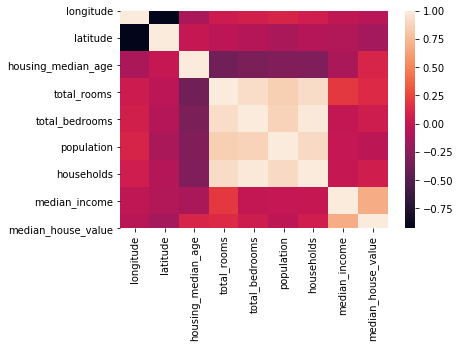

In [71]:
print (cm)
ax = sns.heatmap(cm)

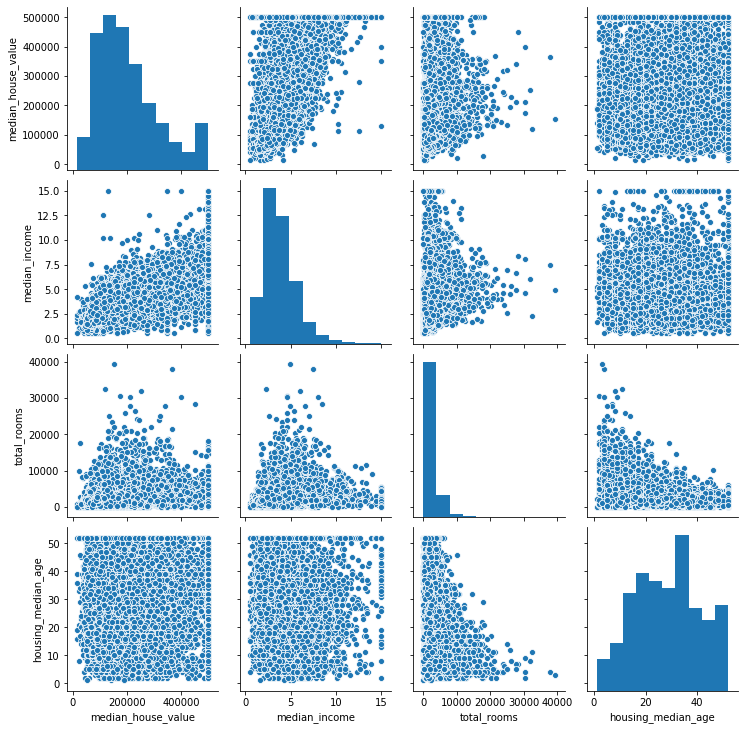

In [72]:
sns.pairplot(ca[['median_house_value','median_income','total_rooms','housing_median_age']])

In [87]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

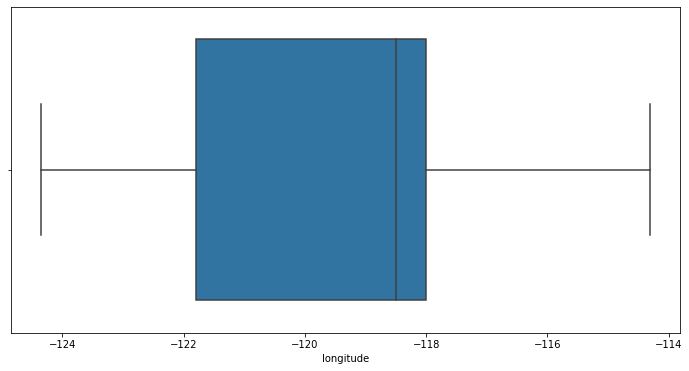

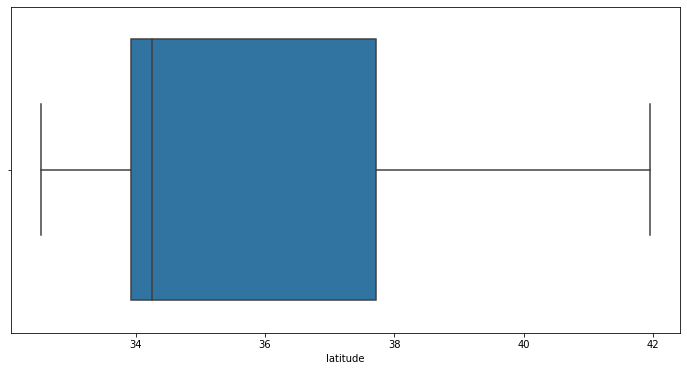

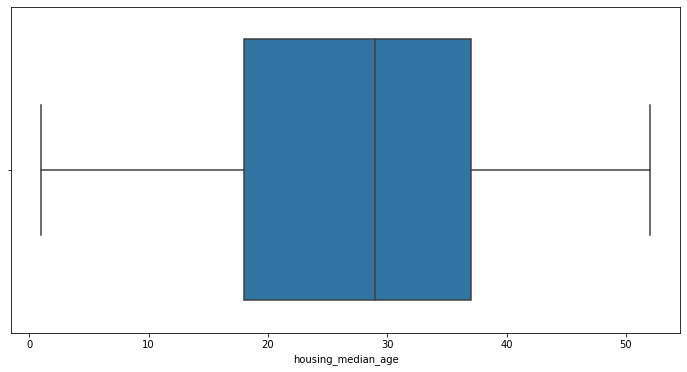

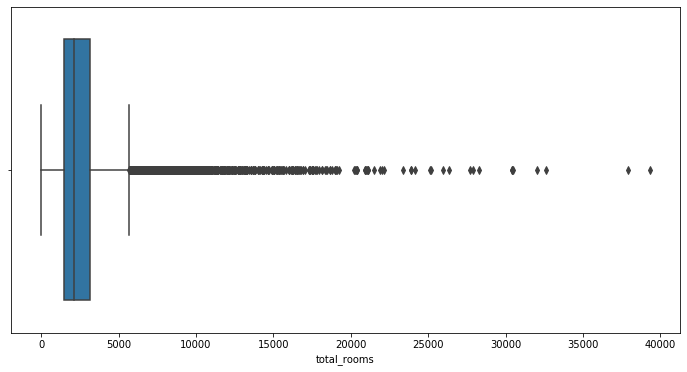

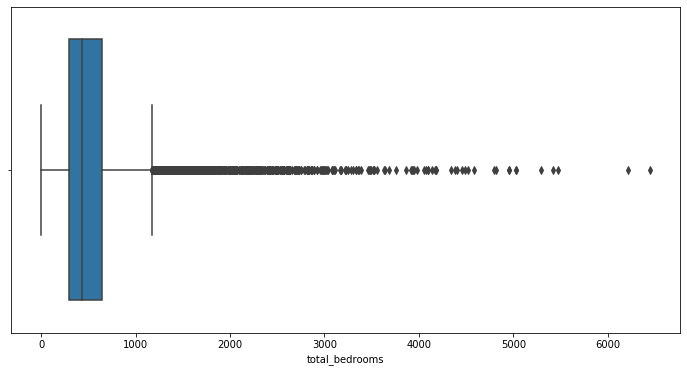

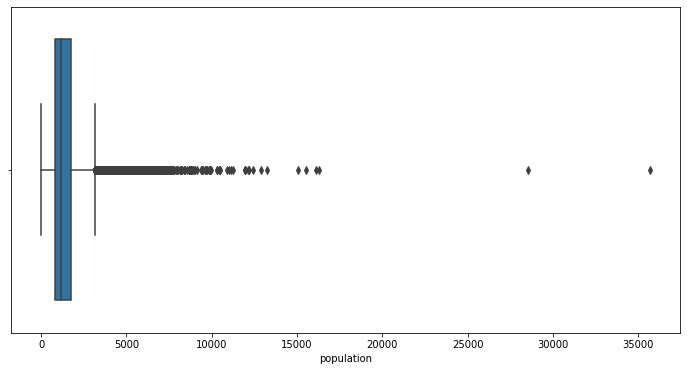

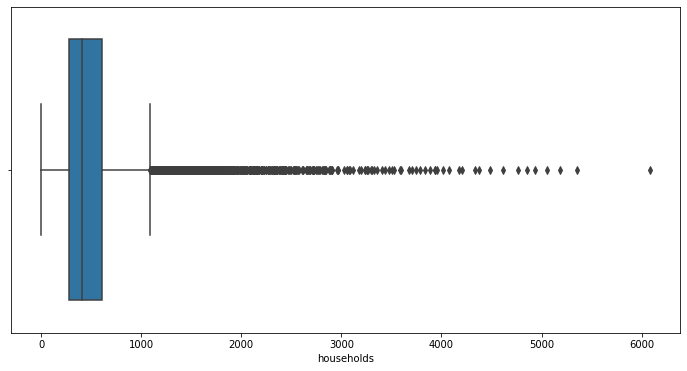

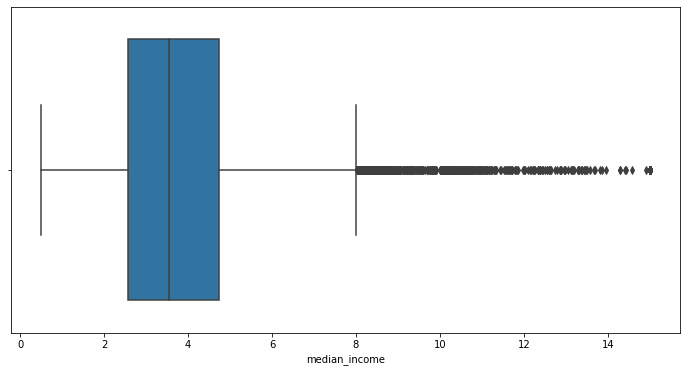

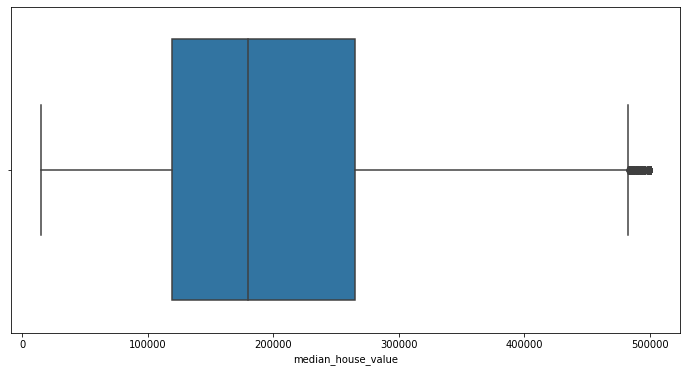

In [88]:
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=ca,ax=ax)

In [104]:
class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    Note: Outlier values are hard coded
    """
    def fit (self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X=X[(X['median_house_value']!=500001) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[X['median_income']<=11].reset_index(drop=True)
        X=X[(X['median_house_value']!=350000) | (X['median_income']>=1.5)].reset_index(drop=True)
        X=X[(X['median_house_value']!=450000) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[(X['median_house_value']>=350000) | (X['median_income']<=9.5)].reset_index(drop=True)
        X=X[X['population']<=9000]
        return X

In [105]:
ca1=ca.copy()
ca1=RemoveOutliers().fit_transform(ca1)

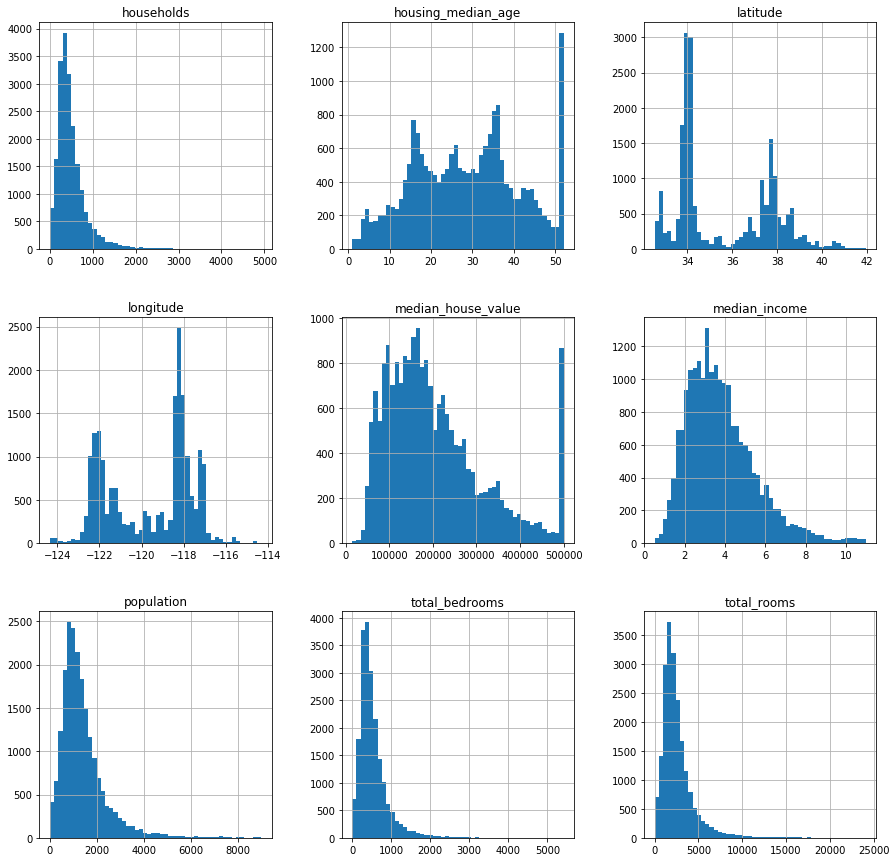

In [106]:
ca1.hist(bins=50, figsize=(15,15))
plt.show()

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(16512, 13) (16512,)
(4128, 13) (4128,)


In [108]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [109]:
predictions

array([107223.99576123, 268234.3338799 , 280651.47524047, ...,
       247915.28398278, 258259.35320472, 135518.09009579])

Text(0, 0.5, 'Predictions')

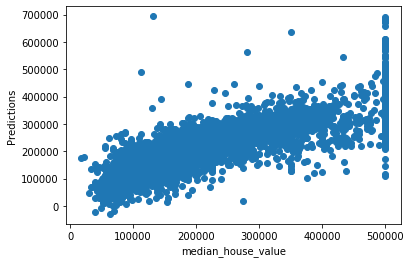

In [110]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("median_house_value")
plt.ylabel("Predictions")

In [ ]:
print ("Score:", model.score(X_test, y_test))

In [ ]:
print ("Score:", model.score(X_train, y_train))

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred)) #MAE

In [ ]:
print(metrics.mean_squared_error(y_test, y_pred)) #MSE

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# Bonus

In [58]:
median_income_train = X_train.median_income
median_income_test = X_test.median_income

In [59]:
#X_train_ME = X_train.drop("median_income",1)
#X_test_ME = X_test.drop("median_income",1)

In [60]:
median_income_train

5414     6.3516
32       1.7969
326      1.2625
8896     4.1365
14175    3.0938
          ...  
2402     2.6058
9016     6.5571
2601     1.8065
19663    1.4529
13370    5.1333
Name: median_income, Length: 16512, dtype: float64

In [61]:
median_income_test

8181     5.6200
11417    5.3428
7742     3.6936
9762     5.6383
182      1.9028
          ...  
12323    3.5208
1211     2.3654
20566    4.3487
680      4.2841
9476     2.1625
Name: median_income, Length: 4128, dtype: float64

In [62]:
MEmodel = lm.create(X_train, target='median_house_value', features=['median_income'], validation_set=None)

NameError: name 'lm' is not defined

In [63]:
MEpredictions

NameError: name 'MEpredictions' is not defined

In [64]:
## The line / model
plt.bar(y_test, predictions)
plt.xlabel("Median Income")
plt.ylabel("Predictions")

NameError: name 'predictions' is not defined

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C73D07940>,
      dtype=object)

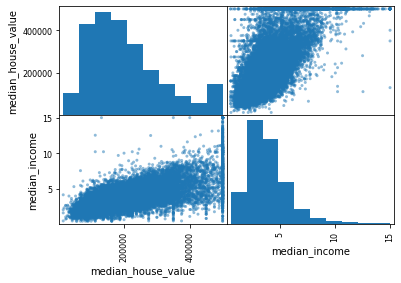

In [67]:
attributes = ['median_house_value', 'median_income']
scatter_matrix(ca[attributes])